### Descrição da Atividade

Você tem acesso a uma base de dados chamada "fashion_mnist". Essa base de dados possui várias imagens, já processadas e em formato de matriz, de roupas de vários estilos classificadas de acordo com as seguintes classes:

0. T-shirt/top (camiseta)
1. Trouser (calça)
2. Pullover (suéter)
3. Dress (vestido)
4. Coat (casaco)
5. Sandal (sandália)
6. Shirt (camisa)
7. Sneaker (tênis)
8. Bag (bolsa)
9. Ankle boot (bota de cano curto)

O frio está passando e você deve criar uma CNN com keras para identificar roupas adequadas para o verão. Portanto, podemos transformar esse problema em uma classificação binária: 0 - Frio, 1 - Calor. Organize os dados e crie uma rede que consiga realizar essa classificação.

### Passo 1: Carregamento e Reclassificação dos Rótulos (Frio vs. Calor) 

Primeiro, carregar os dados e transformar os rótulos de 10 classes para apenas duas:

* **Calor (1)**: T-shirt/top, Dress, Sandal, Shirt, Sneaker, Bag
* **Frio (0)**: Trouser, Pullover, Coat, Ankle boot


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Recarregando os dados para garantir que os rótulos estão no formato original
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalização e reshape
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

# Lista de classes consideradas de "Calor"
calor_classes = [0, 3, 5, 6, 7, 8]

# Função para remapear os rótulos para 0 (Frio) ou 1 (Calor)
def remapear_labels(labels):
  # A função np.isin checa se cada elemento de 'labels' está em 'calor_classes'
  # e retorna um array de booleans (True/False), que é convertido para int (1/0).
  new_labels = np.isin(labels, calor_classes).astype(int)
  return new_labels

# Aplicando o remapeamento
y_train_binary = remapear_labels(y_train)
y_test_binary = remapear_labels(y_test)

# Verificando a transformação
print("Rótulos originais:", y_train[:15])
print("Rótulos binários: ", y_train_binary[:15])

2025-08-22 23:01:33.729960: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-22 23:01:36.400483: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-22 23:01:40.798164: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Rótulos originais: [9 0 0 3 0 2 7 2 5 5 0 9 5 5 7]
Rótulos binários:  [0 1 1 1 1 0 1 0 1 1 1 0 1 1 1]


### Passo 2: Construção da CNN 

Nesse passo criamos a arquitetura da rede neural. Usaremos uma estrutura simples e eficaz para classificação de imagens.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # 1ª Camada de Convolução: extrai características iniciais
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    # 2ª Camada de Convolução: aprende características mais complexas
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Achatamento (Flatten): transforma a matriz em um vetor
    Flatten(),

    # Camada Densa: combina as características para classificar
    Dense(128, activation='relu'),
    Dropout(0.5), # Ajuda a prevenir overfitting

    # Camada de Saída: 1 neurônio com 'sigmoid' para classificação binária
    Dense(1, activation='sigmoid')
])

# Mostra um resumo do modelo criado
model.summary()

/workspaces/aps/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-22 23:01:52.197211: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 223,873 (874.50 KB)

 Trainable params: 223,873 (874.50 KB)

 Non-trainable params: 0 (0.00 B)

### Passo 3: Compilação do Modelo 

Antes do treino, configuramos o otimizador, a função de perda e as métricas. Para um problema binário, usamos `binary_crossentropy` como perda.

In [3]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Passo 4: Treinamento do Modelo 

Com tudo pronto, vamos treinar o modelo com nossos dados. Este processo pode levar alguns minutos.

In [4]:
print("Iniciando o treinamento...")

history = model.fit(x_train,
                    y_train_binary,
                    epochs=10, # O modelo verá o dataset completo 10 vezes
                    batch_size=64,
                    validation_data=(x_test, y_test_binary))

print("Treinamento concluído!")

Iniciando o treinamento...
Epoch 1/10


2025-08-22 23:02:03.482045: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.


936/938 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8636 - loss: 0.3021

2025-08-22 23:02:40.545288: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 31360000 exceeds 10% of free system memory.


938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 39ms/step - accuracy: 0.9026 - loss: 0.2292 - val_accuracy: 0.9314 - val_loss: 0.1672
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9359 - loss: 0.1591 - val_accuracy: 0.9399 - val_loss: 0.1521
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9433 - loss: 0.1416 - val_accuracy: 0.9424 - val_loss: 0.1386
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9490 - loss: 0.1289 - val_accuracy: 0.9443 - val_loss: 0.1328
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9508 - loss: 0.1202 - val_accuracy: 0.9441 - val_loss: 0.1331
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9549 - loss: 0.1119 - val_accuracy: 0.9488 - val_loss: 0.1255
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 31ms/step - accuracy: 0.9585 - loss: 0.1046 - val_accuracy: 0.9490 - val_loss: 0.1232
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.9606 - loss: 0.0984 - val_accurac

### Passo 5: Avaliação e Visualização dos Resultados 

Finalmente, avaliamos o desempenho do modelo no conjunto de teste e visualizamos o progresso do treinamento.

 27/313 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9470 - loss: 0.1418

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9536 - loss: 0.1254

Acurácia no conjunto de teste: 95.36%


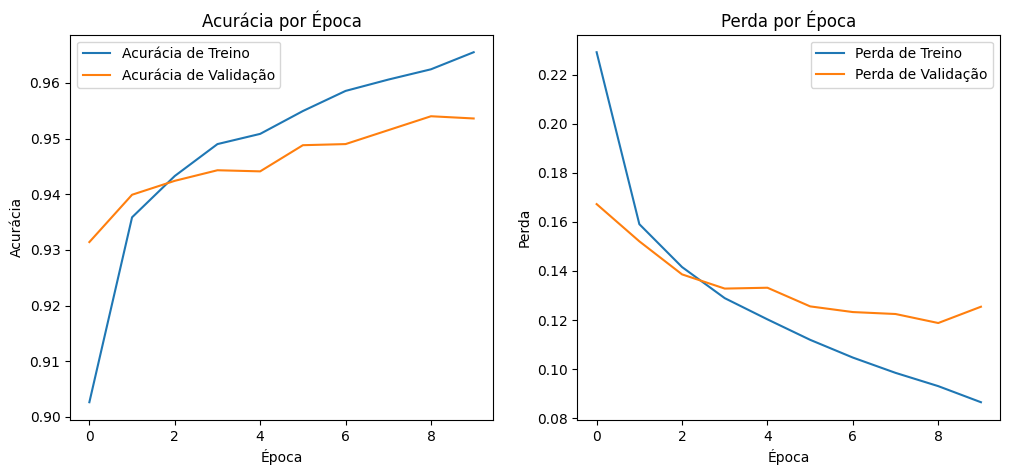

In [5]:
# Avalia a acurácia final do modelo
loss, accuracy = model.evaluate(x_test, y_test_binary)
print(f"\nAcurácia no conjunto de teste: {accuracy * 100:.2f}%")

# Gráfico da acurácia durante o treinamento
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Gráfico da perda durante o treinamento
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treino')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.title('Perda por Época')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

plt.show()

### Passo 6: Visualização de Predições em Imagens 

Agora, além da avaliação quantitativa, vamos visualizar algumas imagens do conjunto de teste
com as respectivas predições do modelo (Frio ou Calor).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


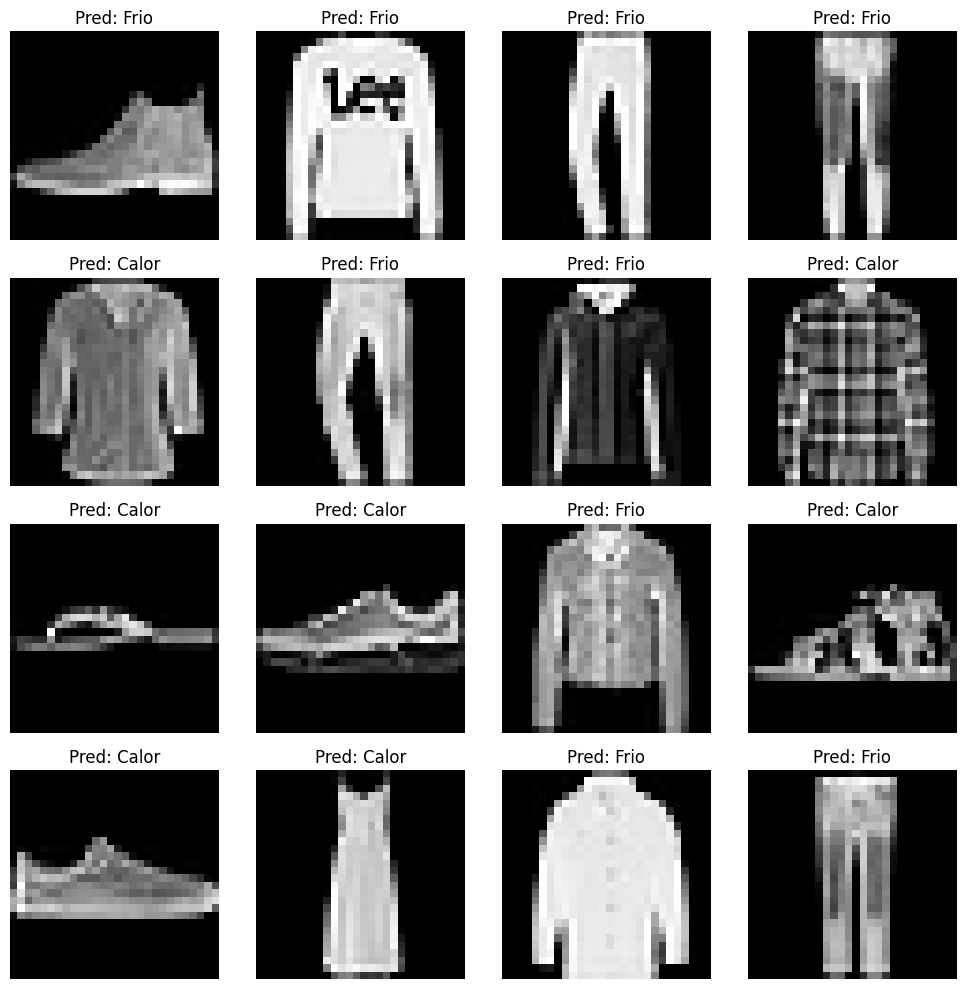

In [6]:
predictions = (model.predict(x_test[:16]) > 0.5).astype("int32")

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title("Pred: " + ("Calor" if predictions[i]==1 else "Frio"))
    plt.axis("off")
plt.tight_layout()
plt.show()